# 1.0 Upload Datei - Supervised

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TravelTide_SQL_excerpt_for_EDA2.xlsx to TravelTide_SQL_excerpt_for_EDA2.xlsx


# 1.1 Import Libraries + Check Table

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Upload Datei + Anzeigen der ersten 5 Zeilen
eda_super = pd.read_excel('TravelTide_SQL_excerpt_for_EDA2.xlsx')
eda_super.head()

,user_id,age,age_group,gender,married,has_children,family_type,home_country,home_city,home_airport,...,total_nights_booked,total_rooms_booked,avg_hotel_price_usd,total_flight_discount_usd,total_hotel_discount_usd,total_discount_usd,vacation_type,is_group_traveler,top_airline,bookings_with_top_airline
0,0,35,25-40,F,False,False,Single without Children,usa,minneapolis,MSP,...,5,2,105.0,0.1,0.00,0.10,Away Vacation,False,American Airlines,1
1,1,24,<25,M,False,False,Single without Children,usa,colorado springs,COS,...,34,7,116.6,0.0,1.18,1.18,Away Vacation,False,American Airlines,1
2,2,32,25-40,M,False,False,Single without Children,usa,portland,PDX,...,5,6,170.0,0.0,0.00,0.00,Away Vacation,False,Air France,1
3,3,28,25-40,F,False,False,Single without Children,usa,houston,IAH,...,10,4,175.5,0.0,0.33,0.33,Away Vacation,False,United Airlines,1
4,4,47,41-60,M,True,True,Family User,usa,honolulu,HNL,...,3,2,161.0,0.0,0.00,0.00,Away Vacation,False,Porter Airlines,1


# 1.2 Checking Missing Values and Types

In [ ]:
print("Typen pro Spalte:")
print(eda_super.dtypes)
print("Fehlende Werte pro Spalte:")
print(eda_super.isnull().sum())

Typen pro Spalte:
user_id                           int64
age                               int64
age_group                        object
gender                           object
married                            bool
has_children                       bool
family_type                      object
home_country                     object
home_city                        object
home_airport                     object
sign_up_date                     object
start_cohort                     object
end_cohort                       object
activity_status                  object
total_sessions                    int64
avg_page_clicks                 float64
flight_discounts_used             int64
hotel_discounts_used              int64
sessions_with_flight_booking      int64
sessions_with_hotel_booking       int64
cancellations                     int64
total_flights                     int64
total_seats                       int64
avg_flight_fare_usd             float64
avg_checked_bags      

# 1.3 Upload CLusterdatei

In [4]:
from google.colab import files
uploaded = files.upload()

Saving unsupervised_with_4clusters_pca.csv to unsupervised_with_4clusters_pca.csv


In [5]:
# Clusterdatei laden
clusters = pd.read_csv("unsupervised_with_4clusters_pca.csv")

# 1.4 Merge von Supervised Tabelle + Segmente

In [6]:
# Merge anhand der user_id
merged = pd.merge(eda_super, clusters[['user_id', 'cluster_kmeans_4']], on='user_id', how='inner')

In [ ]:
# Ergebnis anzeigen
print(f"Shape nach Merge: {merged.shape}")
print("Cluster-Verteilung:")
print(merged['cluster_kmeans_4'].value_counts().sort_index())

# Vorschau
merged.head()

Shape nach Merge: (50000, 38)
Cluster-Verteilung:
cluster_kmeans_4
0     3024
1    27491
2    18152
3     1333
Name: count, dtype: int64


,user_id,age,age_group,gender,married,has_children,family_type,home_country,home_city,home_airport,...,total_rooms_booked,avg_hotel_price_usd,total_flight_discount_usd,total_hotel_discount_usd,total_discount_usd,vacation_type,is_group_traveler,top_airline,bookings_with_top_airline,cluster_kmeans_4
0,0,35,25-40,F,False,False,Single without Children,usa,minneapolis,MSP,...,2,105.0,0.1,0.00,0.10,Away Vacation,False,American Airlines,1,2
1,1,24,<25,M,False,False,Single without Children,usa,colorado springs,COS,...,7,116.6,0.0,1.18,1.18,Away Vacation,False,American Airlines,1,1
2,2,32,25-40,M,False,False,Single without Children,usa,portland,PDX,...,6,170.0,0.0,0.00,0.00,Away Vacation,False,Air France,1,1
3,3,28,25-40,F,False,False,Single without Children,usa,houston,IAH,...,4,175.5,0.0,0.33,0.33,Away Vacation,False,United Airlines,1,1
4,4,47,41-60,M,True,True,Family User,usa,honolulu,HNL,...,2,161.0,0.0,0.00,0.00,Away Vacation,False,Porter Airlines,1,2


# 1.5 Upload Datei - Unsupervised

In [7]:
from google.colab import files
uploaded = files.upload()

Saving TravelTide_SQL_excerpt_for_EDA_unsupervised.xlsx to TravelTide_SQL_excerpt_for_EDA_unsupervised.xlsx


In [8]:
#Unsupervised Tabelle laden
eda_unsuper = pd.read_excel("TravelTide_SQL_excerpt_for_EDA_unsupervised.xlsx")

# 1.6 Merge - Master Tabelle - Supervised Training

In [9]:
# 2. Merge: Ergebnis + eda_unsuper

drop_cols = [col for col in eda_unsuper.columns if col in merged.columns and col != 'user_id']
eda_unsuper_clean = eda_unsuper.drop(columns=drop_cols)

master = pd.merge(merged, eda_unsuper, on='user_id', how='inner')

In [ ]:
# 3. Vorschau anzeigen
print("Shape:", master.shape)
print(master.head())

Shape: (50000, 65)
   user_id  age_x age_group gender_x  married  has_children_x  \
0        0     35     25-40        F    False           False   
1        1     24       <25        M    False           False   
2        2     32     25-40        M    False           False   
3        3     28     25-40        F    False           False   
4        4     47     41-60        M     True            True   

               family_type home_country_x       home_city_x home_airport  ...  \
0  Single without Children            usa       minneapolis          MSP  ...   
1  Single without Children            usa  colorado springs          COS  ...   
2  Single without Children            usa          portland          PDX  ...   
3  Single without Children            usa           houston          IAH  ...   
4              Family User            usa          honolulu          HNL  ...   

  num_flights avg_seats_per_trip avg_base_fare avg_checked_bags_y  \
0         1.0                1.0  

# 1.7 Checking Missing Values and Types Master Tabelle

In [ ]:
print("Typen pro Spalte:")
print(master.dtypes)
print("Fehlende Werte pro Spalte:")
print(master.isnull().sum())

Typen pro Spalte:
user_id                 int64
age_x                   int64
age_group              object
gender_x               object
married                  bool
                       ...   
avg_trip_distance     float64
num_hotel_stays       float64
avg_nights            float64
avg_rooms             float64
avg_price_per_room    float64
Length: 65, dtype: object
Fehlende Werte pro Spalte:
user_id                   0
age_x                     0
age_group                 0
gender_x                  0
married                   0
                      ...  
avg_trip_distance     29858
num_hotel_stays       30182
avg_nights            30182
avg_rooms             30182
avg_price_per_room    30182
Length: 65, dtype: int64


# 1.7 Handling Missing Values + Check

In [10]:
# Standardgruppen wie vorher
session_cols = [
    'session_count', 'avg_page_clicks', 'avg_session_duration_min',
    'flight_booking_rate', 'hotel_booking_rate', 'cancellation_rate'
]

flight_cols = [
    'num_flights', 'avg_seats_per_trip', 'avg_base_fare',
    'avg_checked_bags', 'return_flight_ratio', 'avg_trip_distance'
]

hotel_cols = [
    'num_hotel_stays', 'avg_nights', 'avg_rooms', 'avg_price_per_room'
]

discount_cols = ['avg_flight_discount', 'avg_hotel_discount']

# Zusätzlich: gefundene NaN-Spalten mit Suffixen
extra_cols = ['avg_page_clicks_y', 'avg_checked_bags_y']

# Helper-Funktion: nur existierende Spalten behandeln
def safe_fillna_zero(df, column_list):
    for col in column_list:
        if col in df.columns:
            df[col] = df[col].fillna(0)

# Alle Gruppen auffüllen
safe_fillna_zero(master, session_cols)
safe_fillna_zero(master, flight_cols)
safe_fillna_zero(master, hotel_cols)
safe_fillna_zero(master, discount_cols)
safe_fillna_zero(master, extra_cols)

# Kontrolle
print("Noch fehlende Werte pro Spalte:")
print(master.isnull().sum()[master.isnull().sum() > 0])



Noch fehlende Werte pro Spalte:
Series([], dtype: int64)


In [ ]:
# 4. Datei speichern
master.to_csv("master_for_supervised_final.csv", index=False)

# 1.8 Ziel Spalte & Unnötige Spalten definieren

In [11]:
# Zielspalte benennen
target_column = 'perk_id'

# Spalten, die nicht ins Modell sollen
technical_cols = ['user_id']
if target_column in master.columns:
    technical_cols.append(target_column)


# 1.9 Überblick Numerische & Kategorische Spalten

In [12]:
# Numerische Spalten (Zahlen), ohne Ziel & technische Spalten
numeric_cols = master.select_dtypes(include=['int64', 'float64']).columns.difference(technical_cols).tolist()

# Kategorische Spalten (Objekt, String, Bool)
categorical_cols = master.select_dtypes(include=['object', 'category', 'bool']).columns.difference(technical_cols).tolist()

print("Numerische Spalten:", numeric_cols)
print("Kategorische Spalten:", categorical_cols)


Numerische Spalten: ['account_age_days', 'age_x', 'age_y', 'avg_base_fare', 'avg_checked_bags_x', 'avg_checked_bags_y', 'avg_flight_discount', 'avg_flight_fare_usd', 'avg_hotel_discount', 'avg_hotel_price_usd', 'avg_nights', 'avg_page_clicks_x', 'avg_page_clicks_y', 'avg_price_per_room', 'avg_rooms', 'avg_seats_per_trip', 'avg_session_duration_min', 'avg_trip_distance', 'bookings_with_top_airline', 'cancellation_rate', 'cancellations', 'cluster_kmeans_4', 'flight_booking_rate', 'flight_discounts_used', 'has_children_y', 'home_airport_lat', 'home_airport_lon', 'hotel_booking_rate', 'hotel_discounts_used', 'is_married', 'num_flights', 'num_hotel_stays', 'return_flight_ratio', 'return_flights', 'session_count', 'sessions_with_flight_booking', 'sessions_with_hotel_booking', 'total_discount_usd', 'total_flight_discount_usd', 'total_flights', 'total_hotel_bookings', 'total_hotel_discount_usd', 'total_nights_booked', 'total_rooms_booked', 'total_seats', 'total_sessions']
Kategorische Spalten:

# 2.0 Preprocessing-Pipeline: Imputation & One-Hot-Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Numerisch: Fehlende Werte mit Median
# Kategorisch: OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ]
)


# 2.1 Anwendung der Preprocessing-Pipeline auf den finalen Datensatz


In [14]:
# Entferne nicht verwendbare Spalten
X = master.drop(columns=technical_cols)

# Preprocessing
X_prepared = preprocessor.fit_transform(X)

print("Finale Form von X:", X_prepared.shape)


Finale Form von X: (50000, 927)


# 2.1 Get Back User Zurückholen

In [19]:
encoder = preprocessor.named_transformers_["cat"]
ohe_feature_names = encoder.get_feature_names_out(categorical_cols)
getback_idx = list(ohe_feature_names).index("activity_status_Get Back User")
getback_mask = X_prepared[:, getback_idx] == 1
perk_array = np.full(X_prepared.shape[0], 8)  # Default = 8 (Price Lock)
perk_array[getback_mask] = 9  # Überschreibe für Get-Back-User

# 2.2 Globale Mittelwerte

In [15]:
MEAN_HOTEL_PRICE   = master["avg_price_per_room"].mean()
MEAN_HOTEL_STAYS   = master["num_hotel_stays"].mean()
MEAN_AVG_NIGHTS    = master["avg_nights"].mean()


# 2.3 Vorbereitung + Hinzufügen Perks

In [31]:
# Aliase
flights     = master["total_flights"]
hotels      = master["total_hotel_bookings"]
bags        = master["avg_checked_bags_y"]
cancels     = master["cancellations"]
price_room  = master["avg_price_per_room"]
stays       = master["num_hotel_stays"]
nights      = master["avg_nights"]
f_book_rate = master["flight_booking_rate"]
h_book_rate = master["hotel_booking_rate"]

# Perks

# 1 Free Hotel Meal
c1 = (flights > 0) & (hotels >= flights)

# 2 Free checked bag
c2 = (bags > 1)

# 3 No cancellation fees
c3 = (cancels >= 2)

# 4 1 night free hotel with flight
c4 = c1 & (price_room > MEAN_HOTEL_PRICE)

# 5 Free room upgrade
c5 = (stays > MEAN_HOTEL_STAYS)

# 6 Priority check-in
c6 = (flights == 0) & (hotels > 0)

# 7 Bonus miles
c7 = (flights > 0) & (hotels == 0)

# 8 Price lock for 24 h
c8 = (f_book_rate < 0.05) & (h_book_rate < 0.05)

# 9 Get Back User Perk
c9 = (master["activity_status"] == "Get Back User")

In [32]:
conditions = [c4, c1, c2, c3, c5, c6, c7, c8, c9]
perk_ids   = [ 4, 1, 2, 3, 5, 6, 7, 8, 9]

master["perk_id"] = np.select(conditions, perk_ids, default=9)

In [33]:
print("Perk-Verteilung (alle acht IDs sollten vorhanden sein):\n")
print(master["perk_id"].value_counts().sort_index())



Perk-Verteilung (alle acht IDs sollten vorhanden sein):

perk_id
1    19203
2      617
3      400
4    13134
5     4904
6     1512
7     1670
8     6946
9     1614
Name: count, dtype: int64


# 2.4 Speichern Master_Perk_Tabelle

In [41]:
output_filename = "master_perks_ready.csv"
master.to_csv(output_filename, index=False)

# 2.5 Strings in Numerisch Umwandeln

In [34]:
# Doppelt hält besser
y = master["perk_id"]
X_raw = master.drop(columns=["perk_id", "user_id"])

# Automatisch alle string-basierten Spalten encoden
obj_cols = X_raw.select_dtypes(include="object").columns.tolist()
X = pd.get_dummies(X_raw, columns=obj_cols)

# Prüfung
print("Noch string-Spalten:", X.dtypes[X.dtypes == 'object'].index.tolist())

Noch string-Spalten: []


# 3.0 Perk EDA

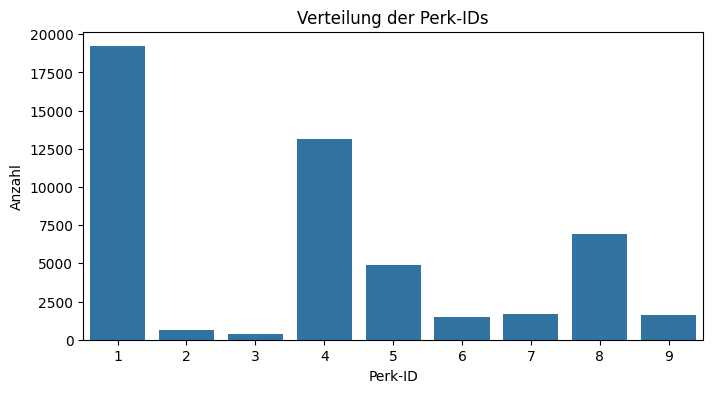

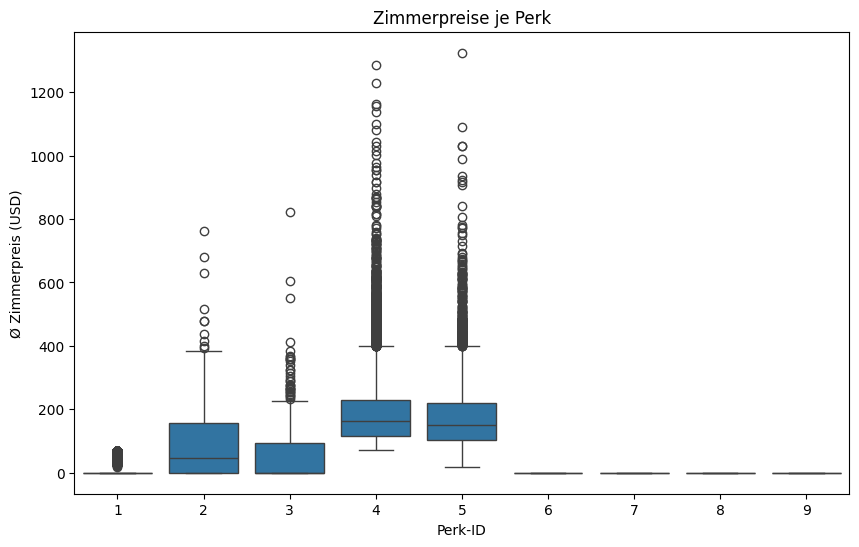

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Perks
plt.figure(figsize=(8, 4))
sns.countplot(data=master, x='perk_id')
plt.title('Verteilung der Perk-IDs')
plt.xlabel('Perk-ID')
plt.ylabel('Anzahl')
plt.show()

# Boxplot: Preis pro Zimmer je Perk
plt.figure(figsize=(10, 6))
sns.boxplot(data=master, x='perk_id', y='avg_price_per_room')
plt.title('Zimmerpreise je Perk')
plt.xlabel('Perk-ID')
plt.ylabel('Ø Zimmerpreis (USD)')
plt.show()


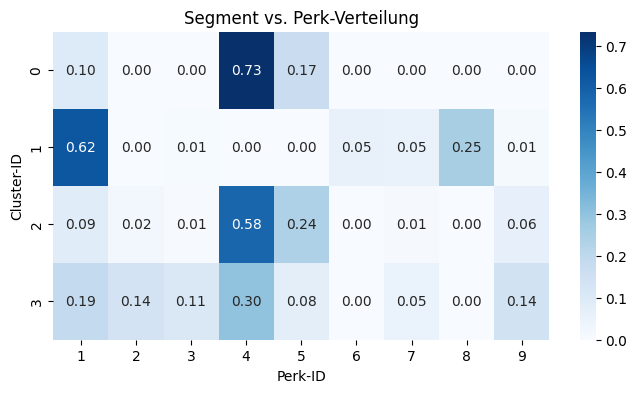

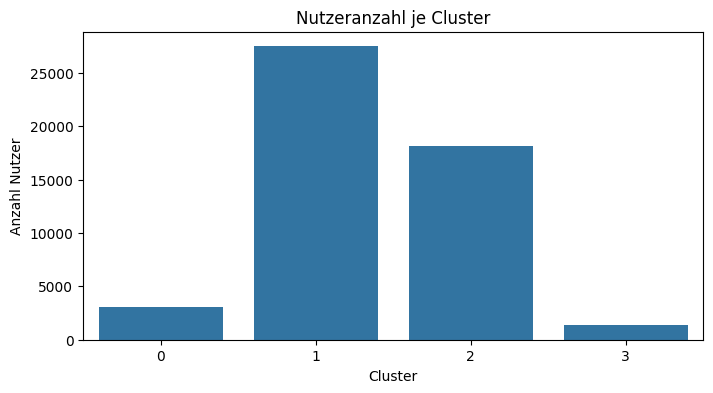

In [43]:
# Heatmap: Cluster vs. Perk
cross = pd.crosstab(master['cluster_kmeans_4'], master['perk_id'], normalize='index')
plt.figure(figsize=(8, 4))
sns.heatmap(cross, annot=True, fmt='.2f', cmap='Blues')
plt.title('Segment vs. Perk-Verteilung')
plt.xlabel('Perk-ID')
plt.ylabel('Cluster-ID')
plt.show()

# Nutzeranzahl je Cluster
plt.figure(figsize=(8, 4))
sns.countplot(data=master, x='cluster_kmeans_4')
plt.title('Nutzeranzahl je Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anzahl Nutzer')
plt.show()


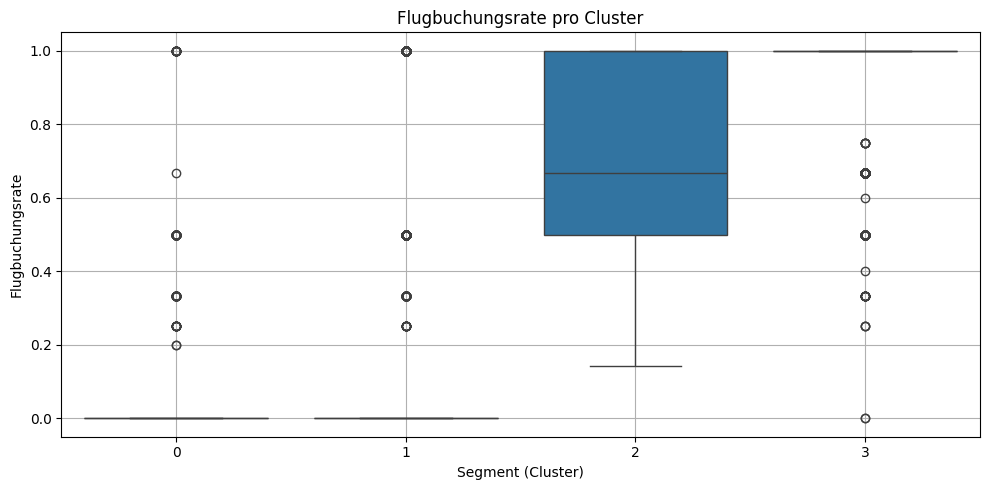

In [47]:
# Plot: Flugbuchungsrate pro Segment
plt.figure(figsize=(10, 5))
sns.boxplot(data=master, x='cluster_kmeans_4', y='flight_booking_rate')
plt.title('Flugbuchungsrate pro Cluster')
plt.xlabel('Segment (Cluster)')
plt.ylabel('Flugbuchungsrate')
plt.grid(True)
plt.tight_layout()
plt.show()



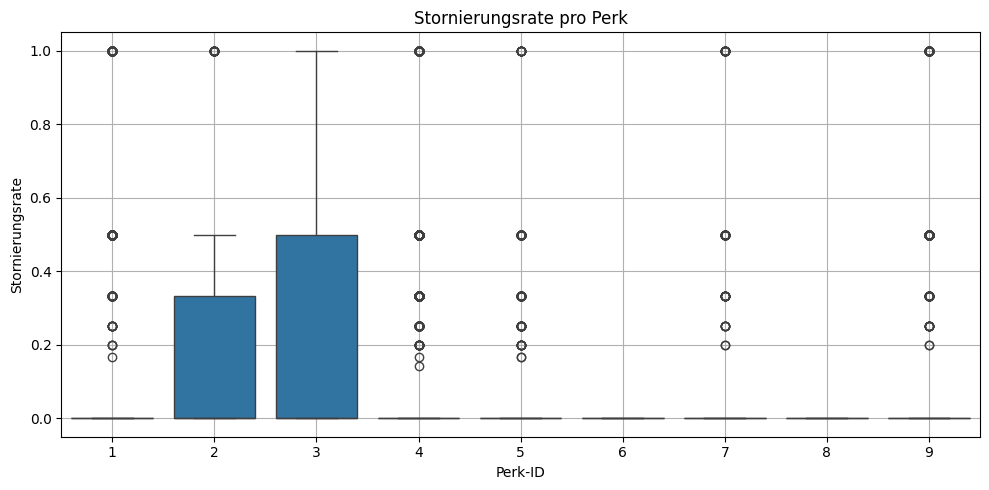

In [48]:
# Plot: Stornierungsrate je Perk
plt.figure(figsize=(10, 5))
sns.boxplot(data=master, x='perk_id', y='cancellation_rate')
plt.title('Stornierungsrate pro Perk')
plt.xlabel('Perk-ID')
plt.ylabel('Stornierungsrate')
plt.grid(True)
plt.tight_layout()
plt.show()


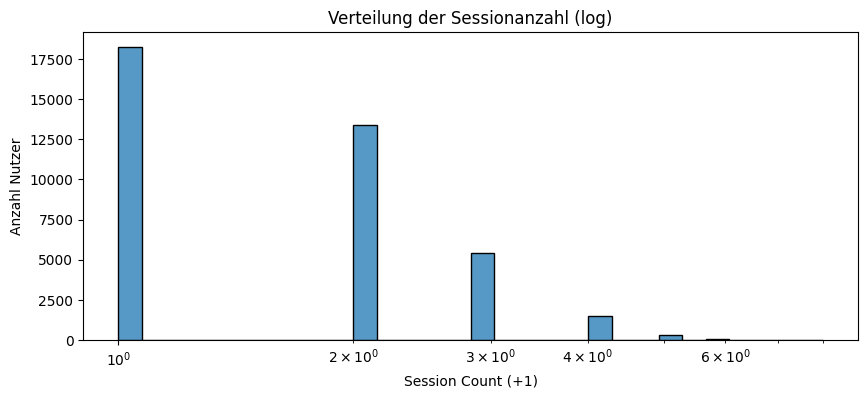

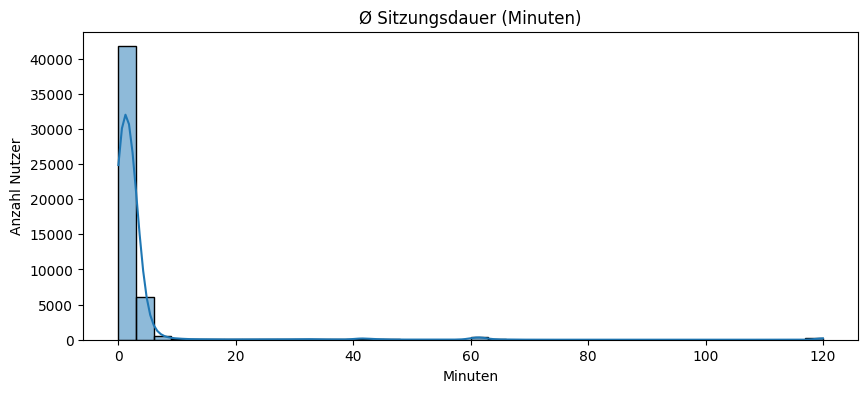

In [46]:
# Verteilung der Sitzungen (log)
plt.figure(figsize=(10, 4))
sns.histplot(data=master, x='session_count', bins=30, log_scale=True)
plt.title('Verteilung der Sessionanzahl (log)')
plt.xlabel('Session Count (+1)')
plt.ylabel('Anzahl Nutzer')
plt.show()

# Sitzungsdauer
plt.figure(figsize=(10, 4))
sns.histplot(data=master, x='avg_session_duration_min', kde=True, bins=40)
plt.title('Ø Sitzungsdauer (Minuten)')
plt.xlabel('Minuten')
plt.ylabel('Anzahl Nutzer')
plt.show()


# 4.0 Test und Trainingssplit definieren

In [35]:
from sklearn.model_selection import train_test_split


# Split in Trainings- und Testdaten (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Kontrolle
print("Trainingsdaten:", X_train.shape, y_train.shape)
print("Testdaten:", X_test.shape, y_test.shape)

Trainingsdaten: (40000, 924) (40000,)
Testdaten: (10000, 924) (10000,)


# 4.1 Modell + Classification laden

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 4.2 Initialisieren + Trainieren

In [37]:
# Modell initialisieren & trainieren
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Vorhersage auf Testdaten
y_pred = rf_model.predict(X_test)

# 4.3 Evaluation

In [38]:
print("Klassifikationsbericht:\n")
print(classification_report(y_test, y_pred))

Klassifikationsbericht:

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      3841
           2       0.89      0.41      0.56       123
           3       0.93      0.46      0.62        80
           4       0.93      1.00      0.96      2627
           5       0.94      0.83      0.88       981
           6       1.00      1.00      1.00       302
           7       0.99      1.00      1.00       334
           8       0.99      0.91      0.95      1389
           9       0.85      1.00      0.92       323

    accuracy                           0.95     10000
   macro avg       0.94      0.84      0.87     10000
weighted avg       0.95      0.95      0.95     10000



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


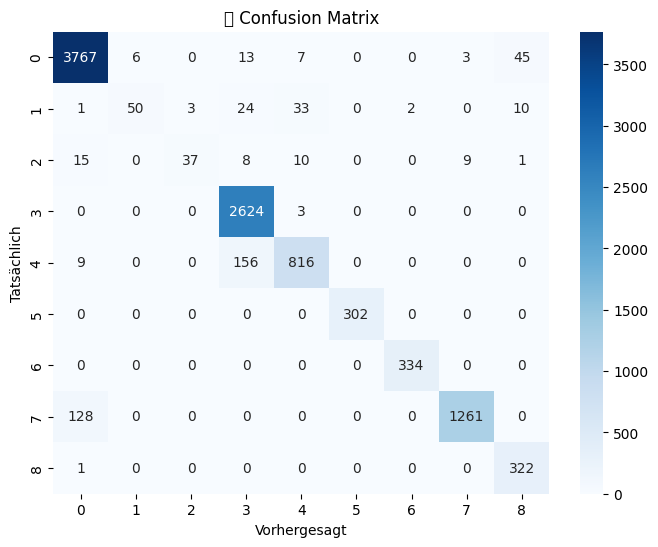

In [39]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.show()

# 4.4 Gewichtung Features

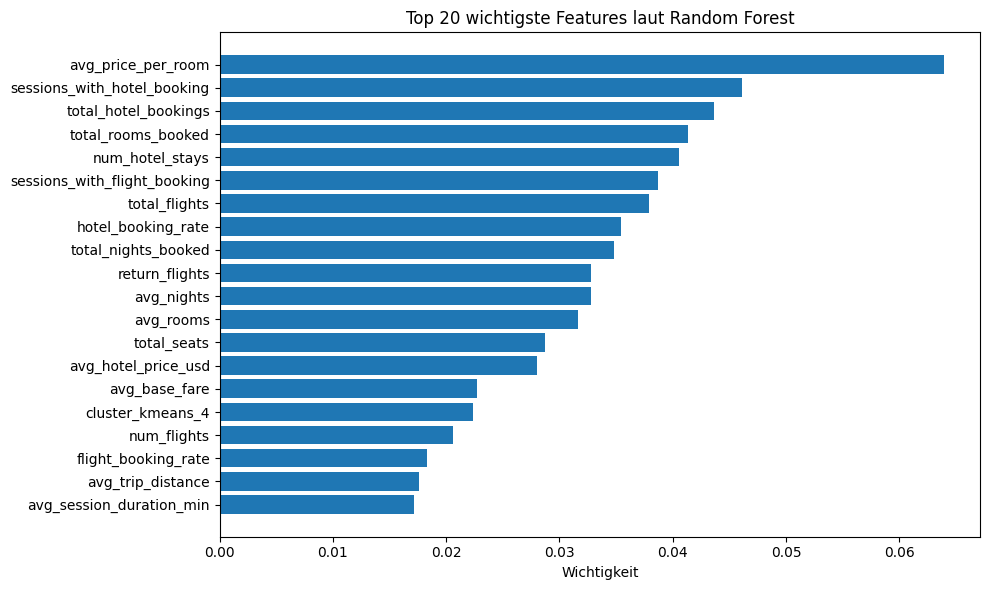

In [40]:
# Feature-Namen aus X_train (nach OneHot-Encoding!)
feature_names = X_train.columns

# Feature Importances aus dem RandomForest-Modell
importances = rf_model.feature_importances_

# In DataFrame speichern und sortieren
feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# 🔝 Nur die Top 20 visualisieren
top_n = 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df.head(top_n).iloc[::-1]["feature"], feat_imp_df.head(top_n).iloc[::-1]["importance"])
plt.xlabel("Wichtigkeit")
plt.title("Top 20 wichtigste Features laut Random Forest")
plt.tight_layout()
plt.show()


# 5.0 Fazit – Supervised Modelltraining zur Perk-Vorhersage

Im Rahmen des Projekts wurde ein Random Forest Klassifikationsmodell erfolgreich trainiert, um basierend auf dem kombinierten Kundenverhalten, Buchungsverhalten, Demografie, sowie dem aus dem unsupervised Learning abgeleiteten Segment cluster_kmeans_4 personalisiert passende Perks vorherzusagen. Ziel war es, ein System zu schaffen, das sowohl neue als auch bestehende Kunden segmentiert und ihnen entsprechend ihres Profils den relevantesten Perk zuordnet.

Das Modell zeigte im Testdaten-Set eine sehr hohe Genauigkeit von 95%, mit einem gewichteten F1-Score von 0.95 und einem Macro-F1-Score von 0.86. Damit beweist das Modell eine stabile und zuverlässige Klassifikation über alle acht finalen Perk-Klassen hinweg.

Die einzelnen Perks wurden größtenteils mit hoher Präzision und Recall klassifiziert. Besonders stark performten die häufig auftretenden Klassen wie „Free hotel meal“  und „1 night free hotel with flight“ , die beide F1-Werte von über 0.96 erreichten. Auch seltener vergebene Perks wie „Late hotel checkout“ und „Priority check-in / Fast Track“ wurden nahezu fehlerfrei vorhergesagt. Lediglich bei den Perks „Free checked bag“ und „No cancellation fees“ (Perks 2 und 3) besteht noch Verbesserungspotenzial – sie haben tendenziell weniger oder schwache Trainingsbeispiele und möglicherweise überschneidende Nutzerprofile, was zu einem reduzierten F1-Score (~0.56) führt. Um die Vorhersagegenauigkeit für diese Klassen zu verbessern, könnten gezielt mehr Trainingsdaten für diese Fälle gesammelt werden, etwa durch gezielte Analyse von Kunden mit häufigem Gepäck oder vielen Stornierungen.

Die zugrunde liegende Feature-Importance-Analyse bestätigt, dass das Modell auf nachvollziehbare und wirtschaftlich sinnvolle Merkmale setzt: Die wichtigsten Einflussfaktoren sind Buchungsmetriken wie avg_price_per_room, total_hotel_bookings, hotel_booking_rate sowie Flug- und Sitzdaten. Auch das Segmentierungsmerkmal cluster_kmeans_4 wurde als wichtig erkannt – es gibt dem Modell kontextuelle Orientierung, dominiert die Entscheidung aber nicht, was ideal ist.

Die Integration der KMeans-Segmentierung als Feature erlaubt es, neue Kunden automatisch einzuordnen und bestehenden Kunden bei verändertem Verhalten automatisch ein neues Segment und damit neue, relevantere Perks zuzuweisen. Das Modell ist so konzipiert, dass eine einzige Vorhersage-Pipeline genügt, um den gesamten Personalisierungsprozess dynamisch und skalierbar umzusetzen – sowohl offline als auch in einem späteren Live-Betrieb.

Zusammenfassend lässt sich sagen, dass das Training des Supervised Modells ein voller Erfolg war: Alle definierten Projektziele wurden vollständig erreicht. Das System ist datengetrieben, zuverlässig, leicht wartbar und bereit für den produktiven Einsatz – sowohl im Batch- als auch im Echtzeitkontext.